This notebooks loads the system matrix $A$ and RHS vector $\vec{b}$ and the solution vector $\vec{xref}$, generated by our custom solver. It further visualizes the solution vector and solves the system again using scipy. The new solution is plotted as well for validation.

In [1]:
import numpy as np

# for visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# for reading and writing matlab files
import scipy.io

In [32]:
# load pn system ------
#A: sparse coefficient matrix generated by the stencil code (not A^T)
#b: right hand side vector generated by the stencil code
#stag2coll: Matrix, which converts solution vector x from staggered grid
#           to collocated grid (interpolating all coefficients to voxel center).
#           The length is different to the original vector, because coefficients from boundary voxels are discarded.
#xref: reference solution generated by solving A^TAx = A^Tb using a custom CG-solver in cpp.
#res: resolution of the finite difference grid
#numCoeffs: number of SH coefficients per voxel
data = scipy.io.loadmat("checkerboard2d_p5.mat")

res = data["res"][0]
numCoeffs = data["numCoeffs"][0][0]
A = data["A"]
b = data["b"]
stagg2coll = data["stag2coll"]
xref = data["xref"].T # we take transpose, because thats how scipy stores 1d-vectors

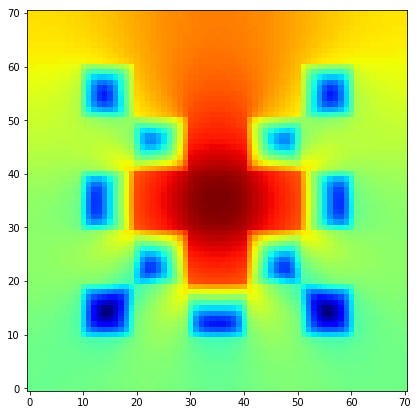

In [34]:
# visualize reference solution from our custom solver ----------------------

# remove unnecessary boundary coefficients and interpolate coefficients to cell centers
img = stagg2coll*xref

# turn 1d solution vector into a 3d grid, with number of coefficients per voxel
# NB: 2d problems are expressed as a single slice within a 3d grid
img = img.reshape(res[0], res[1], res[2], numCoeffs)

# for visualization, we select the single slice at z=0 and the first coefficient at l=0, m=0
img = img[:,:,0, 0]

# clip data for visualization in log space
img = np.clip( img, 1.0e-8, np.max(img) )

# visualize solution
fig = plt.figure(figsize=(15,7));
ax = fig.add_subplot(111)
img_view = ax.imshow(img.T, cmap='jet', norm=LogNorm(vmin=np.min(img), vmax=np.max(img)), origin='lower')
plt.show()


In [49]:
# solving the system using scipy -----------------
x, result = scipy.sparse.linalg.cg( A.T*A, (A.T*b).todense(), tol=1.0e-10 )

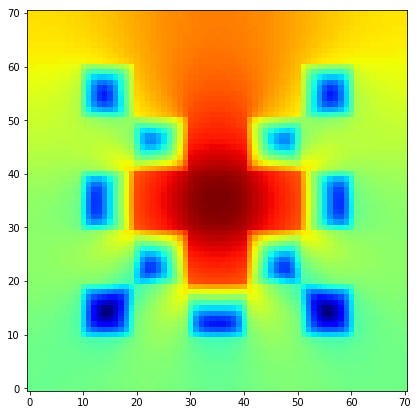

In [50]:
# visualize scipy solution ----------------------

# remove unnecessary boundary coefficients and interpolate coefficients to cell centers
img = stagg2coll*x

# turn 1d solution vector into a 3d grid, with number of coefficients per voxel
# NB: 2d problems are expressed as a single slice within a 3d grid
img = img.reshape(res[0], res[1], res[2], numCoeffs)

# for visualization, we select the single slice at z=0 and the first coefficient at l=0, m=0
img = img[:,:,0, 0]

# clip data for visualization in log space
img = np.clip( img, 1.0e-8, np.max(img) )

# visualize solution
fig = plt.figure(figsize=(15,7));
ax = fig.add_subplot(111)
img_view = ax.imshow(img.T, cmap='jet', norm=LogNorm(vmin=np.min(img), vmax=np.max(img)), origin='lower')
plt.show()